## Exploratory Data Analysis

In [50]:
import pandas as pd
import numpy as np

In [28]:
salaries = pd.read_csv('ds_salaries_clean.csv')
books = pd.read_csv('clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


####  .info() method
Returns a summary of column non-missing values and data types from the DataFrame

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


#### .describe() method
Returns summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in DataFrame

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


#### .value_counts(col) method

returns a count of the values in the specified column

In [6]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

#### Seaborn
Python package for data visualization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Histograms with Seaborn

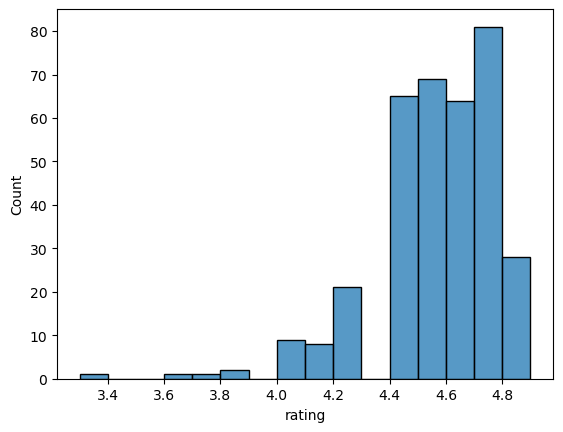

In [8]:
sns.histplot(data=books, x='rating', binwidth=.1)
plt.show()

#### Updating Data Types with .astype(type)

In [9]:
books['year'] = books['year'].astype(float)
books.year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 350 entries, 0 to 349
Series name: year
Non-Null Count  Dtype  
--------------  -----  
350 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [10]:
books['year'] = books['year'].astype(int)

Python Data Types:
* str
* int
* float
* dict
* list
* bool

#### .isin(list)
Return boolean series of same dimension as DataFrame with whether value in list is in the DataFrame

In [11]:
books['genre'].isin(['Non Fiction', 'Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [12]:
~books['genre'].isin(['Non Fiction', 'Fiction'])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

Using the above .isin() code as a filter.

In [13]:
books[books['genre'].isin(['Non Fiction', 'Fiction'])]

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction
...,...,...,...,...,...
344,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,2018,Non Fiction
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction


#### .select_dtypes(type) method
Returns columns of specified type.

In [14]:
books.select_dtypes('number')

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019
...,...,...
345,4.4,2012
346,4.5,2012
347,4.2,2010
348,4.8,2013


#### .min() and .max() methods

In [15]:
books['year'].min()

2009

#### Boxplot Example

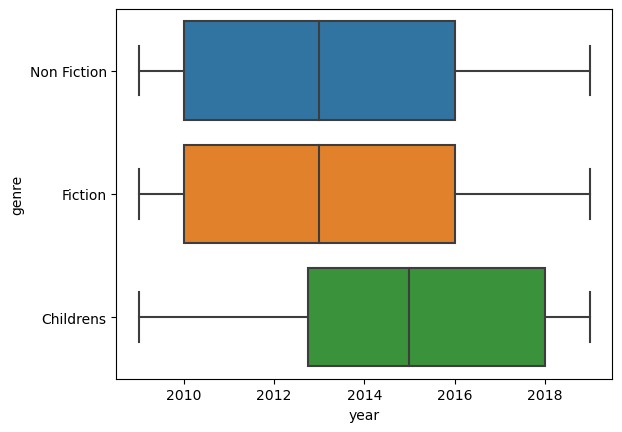

In [16]:
sns.boxplot(data=books, x='year',  y='genre');
plt.show()

#### .groupby(col) method
Returns grouped dataset by specified category summarized by an aggregating function

In [22]:
books.groupby('genre').mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


Aggregating Functions of note to be used with .groupby:
* `.mean()`
* `.sum()`
* `.count()`
* `.min()`
* `.max()`
* `.var()`
* `.std()`

#### .agg() method
Applies aggregating function accross the DataFrame

In [23]:
books.agg(['mean','std'])

C:\Users\James\AppData\Local\Temp\ipykernel_25240\2787969173.py:1: FutureWarning: ['name', 'author', 'genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  books.agg(['mean','std'])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


We can specify which aggregating function to apply to each column by passing an object.

In [24]:
books.agg({
    'rating': ['mean', 'std'],
    'year': ['median']
})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


We can assign and display aggregating functions to particular columns when using `groupby` as follows:

In [25]:
books.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    std_rating=('rating', 'std'),
    median_year=('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


#### Barplot Example
The vertical line on top of each bar indicates a 95% confidence interval.

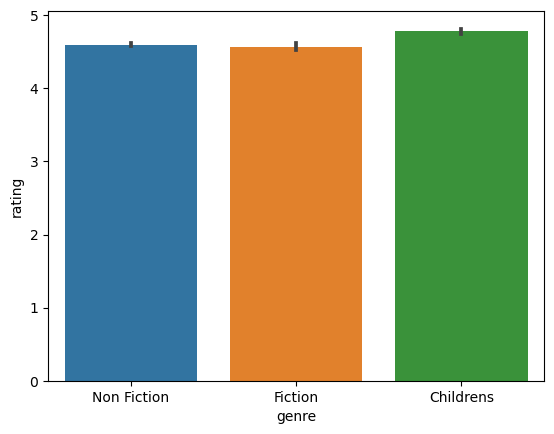

In [26]:
sns.barplot(data=books, x='genre',  y='rating')
plt.show()

## Handling Missing Values

We can count the number of missing values per column by chaining `.isna().` and `.sum()`.

In [29]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


#### Rule of Thumb: Drop missing values if the they amount to 5% or less of total values.

#### If more than 5%, we can replace the values with summary statistics (impute)

#### Determining 5% theshold:

In [30]:
threshold = int(len(salaries) *.05)
threshold

30

#### Filter by columns to drop:

In [31]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

#### Drop columns with .dropna(cols)

In [32]:
salaries.dropna(subset=cols_to_drop, inplace=True)
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


#### Filtering to impute summary statistics:

In [93]:
cols_with_missing_values = salaries.columns[salaries.isna().sum()>0]
cols_with_missing_values

Index([], dtype='object')

#### Imputing mode to missing values.

In [94]:
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

#### Imputing by sub-group with median:

In [96]:
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()


{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}

In [97]:
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

In [98]:
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


## Converting and Analyzing Categorical Data

#### Using select_dtypes to filter any non-numeric data for a preview

In [36]:
salaries.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


#### Viewing frequency values in a specific column

In [40]:
salaries["Designation"].value_counts().head()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: Designation, dtype: int64

#### Counting number of unique categories

In [42]:
salaries["Designation"].nunique()

50

#### pandas.Series.str.contains() is used to search a column for a specific string or multiple strings

In [44]:
salaries['Designation'].str.contains('Scientist')

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [45]:
salaries['Designation'].str.contains('Machine Learning|AI')

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

#### Creating a new column of categories by using multiple phrases in a search string.

In [52]:
# Create list of differenct categories which will be the values of the new column
job_categories = [
    'Data Science',
    'Data Analytics',
    'Data Engineering',
    'Machine Learning',
    'Managerial',
    'Consultant'
]

In [53]:
# Create variables containing our filters to search
data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [54]:
# Create a list with range of conditions for the .contains method
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

In [55]:
# Creating the new column:
salaries['Job_Category'] = np.select(conditions,
                                     job_categories,
                                     default='Other')

In [61]:
# Preview new column
salaries[['Designation', 'Job_Category']].head()

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


#### Example of  Seaborn's  countplot

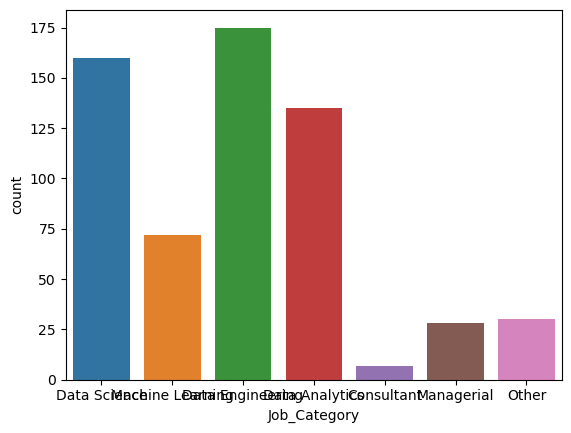

In [67]:
sns.countplot(data=salaries, x='Job_Category')
plt.show()

## Working with Numeric Data

#### Converting strings to numbers


Use `pd.Series.str.replace('[characters to remove]', '[characters to replace with]')`


Since data set is cleaned following code will not work, but the syntax is as follows: `salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].str.replace(',', '')`

To convert string to number:
`salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].astype(float)`

#### Adding summary statistics directly into a DataFrame:

`salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'.transform(lambda x: x.std())`

`salaries['std_dev'] = salaries.groupby('Company_Size')['Salary_USD'.transform(lambda x: x.median())`